# 7 **First Cut Approach**

In [ ]:
#https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/data?select=train.csv

In [5]:
#load a data help of pandas 
df = pd.read_csv('train.csv')

In [6]:
#read the data help of pandas
pd.options.display.precision = 13
df.head()

,acoustic_data,time_to_failure
0,12,1.4690999832
1,6,1.4690999821
2,8,1.4690999810
3,5,1.4690999799
4,8,1.4690999788


In [7]:
df.shape

(629145480, 2)

##  7.1 **Statistical Based Feature**

As we know we have only one column present in our dataset, so we have to create a new dataset using the help of feature engineering.

Our data is based on the time series so we use time series-based feature engineering techniques.

In [ ]:
#number of samples
629145480//150000

4194

In [ ]:
from tqdm import tqdm
sample_value = 150000
mean_value = []
std_value = []
quantile_value = []
kurtosis = []
skew_val = []
mad_value = []
time_to_left = []

for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    #append last value of the failure 
    time_to_left.append(x.time_to_failure.values[-1])
    #append the mean, std, 95% quantiles values, kurtosis values
    mean_value.append(x.acoustic_data.mean())
    std_value.append(x.acoustic_data.std())
    quantile_value.append(np.quantile(x.acoustic_data, 0.95))
    kurtosis.append(x.acoustic_data.kurtosis())
    skew_val.append(x.acoustic_data.skew())
    mad_value.append(robust.mad(x.acoustic_data))

mean_value = np.array(mean_value)
std_value = np.array(std_value)
quantile_value = np.array(quantile_value)
kurtosis = np.array(kurtosis)
skew_val = np.array(skew_val)
mad_value = np.array(mad_value)
time_to_left = np.array(time_to_left)

100%|██████████| 4194/4194 [00:50<00:00, 83.11it/s]


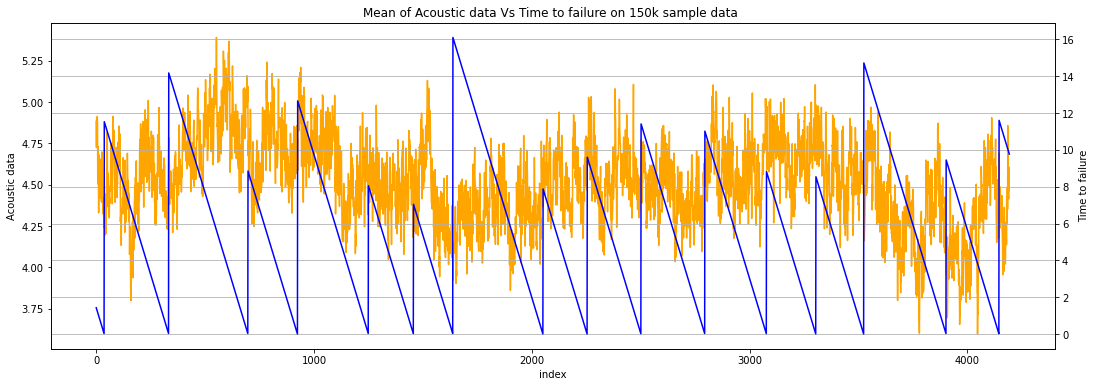

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Mean of Acoustic data Vs Time to failure on 150k sample data ')
p1 = sns.lineplot(data=mean_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

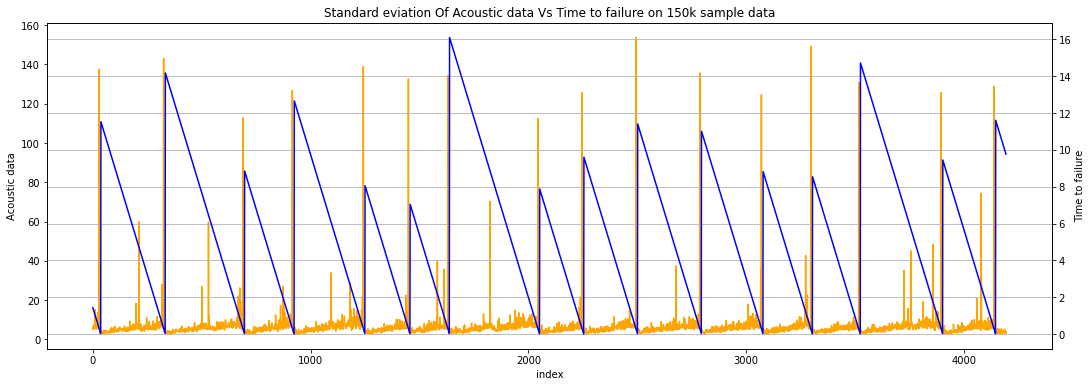

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Standard eviation Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=std_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

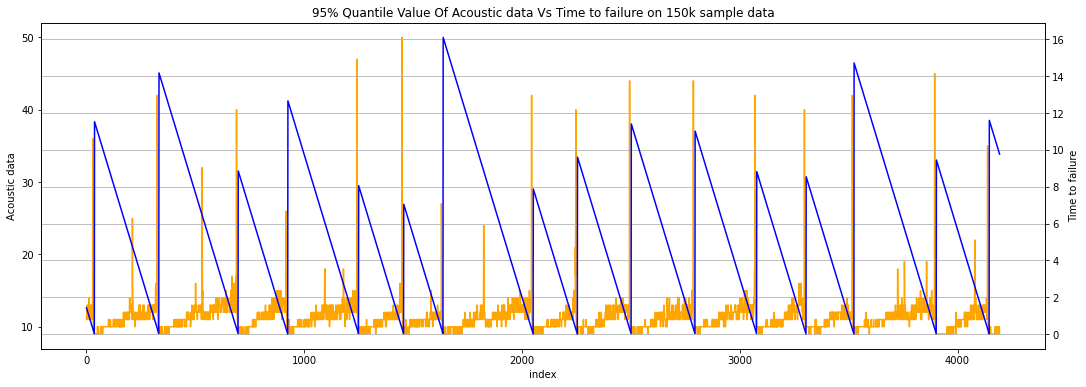

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('95% Quantile Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=quantile_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

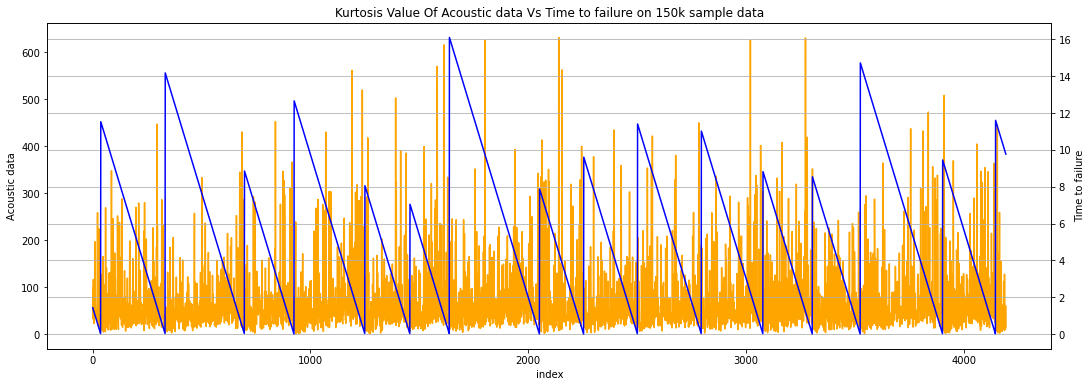

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Kurtosis Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=kurtosis, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

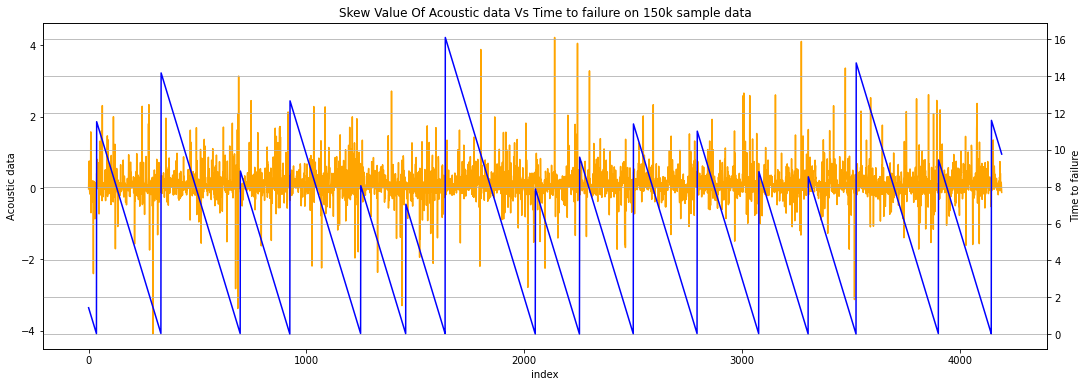

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Skew Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=skew_val, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

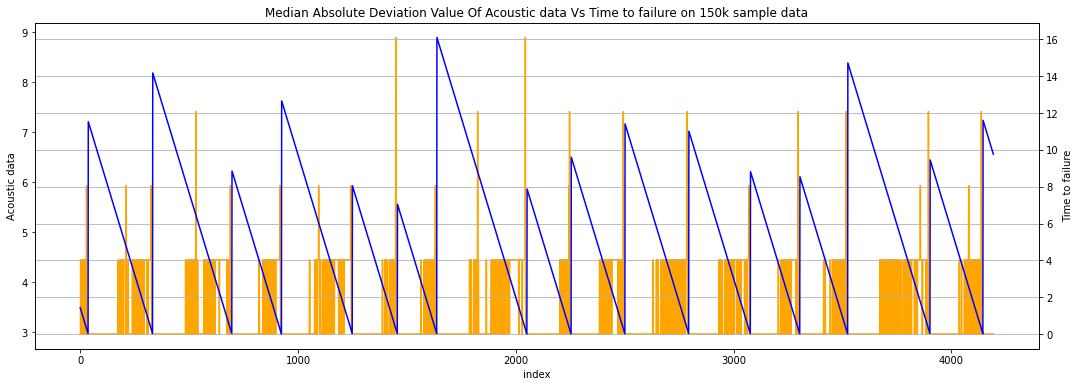

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Median Absolute Deviation Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=mad_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

For the new feature first, we go with the statistical-based feature like mean, standard deviation, quantile values, skew, etc.
More about time series https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

Here first we create a data samples size of 150k data points from the whole data set and we apply a different statistical, and we plot the graph time_to_failure vs statistical features,

So in your mind, there is one question why do we take the size of the sample as 150k, not another.

Basically, we have to predict time_to_failure on the test dataset, and as we know each test dataset file contains 150k rows of acoustic signal values so we take a sample size as 150k data points.

Our dataset contains a 16 earthquake signal(from Kaggle), and we have to see here can all statistical feature is useful to determine the 16 earthquakes or not.

For the understanding, we create some features and we plot the graph, we take a 6 feature here,
<b><p>1 Mean values on 4194 sample of data. </p></b>
<b><p>2 Standard deviation on 4194 sample of data.</p></b>
<b><p>3 Quantile values on 4194 sample of data.</p></b>
<b><p>4 Kurtosis values on 4194 sample of data.</p></b>
<b><p>5 Skew values on 4194 sample of data.</p></b>
<b><p>6 Median absolute deviation on 4194 sample of data.</p></b>

We are familiar with what is mean and quantiles values but skew and kurtosis are new, In statistics, skewness and kurtosis are two ways to measure the shape of a distribution.
    
As we know skewness is a measure of the asymmetry of the distribution,The skewness value can be positive, zero, negative, or undefined and kurtosis measure the thickness of the tails of the distributions and fatter tail imply the presences of the large number of the outliers.

As we know we have 4194 samples and each sample contains 150k datapoints, now on top of it we apply different techniques such as mean, Standard deviations, etc, and then we observed the feature vs time to failure graphs, and from this graph, we can say that when the acoustic single values are very high time to failure is also high and these all features determine the all earthquakes easily.


###  7.1.1 **Create different Statistical features**

In this section we create the some statistical features mean values, max values, min values, etc.

In [ ]:
def ext_fet(x):
    features = {}
    features['average_value'] = x.values.mean()
    features['std_value'] = x.values.std()
    features['max_value'] = x.values.max()
    features['min_value'] = x.values.min()
    features['kurtosis']  = x.kurtosis()
    features['skew'] = x.skew()
    features['MAD_value'] = robust.mad(x.values)
    #take absolute values
    features['abs_average_value'] = np.abs(x.values).mean()
    features['abs_std_value'] = np.abs(x.values).std()
    features['abs_max_value'] = np.abs(x.values).max()
    features['abs_median'] = np.median(np.abs(x.values))
    #take top 3 quantile
    features['99_quantile'] = np.quantile(x.values, 0.99)
    features['95_quantile'] = np.quantile(x.values, 0.95)
    features['90_quantile'] = np.quantile(x.values, 0.90)
    #take low 3 quantile
    features['01_quantile'] = np.quantile(x.values, 0.01)
    features['05_quantile'] = np.quantile(x.values, 0.05)
    features['10_quantile'] = np.quantile(x.values, 0.10)
    #take interquantile range
    features['interquantile'] = np.quantile(x.values, 0.27) - np.quantile(x.values, 0.25)
    #mean and std of last and first 5k datapoints
    features['mean_of_first_50000'] = x[:50000].values.mean()
    features['mean_of_last_50000'] = x[:-50000].values.mean()

    return features

In [ ]:
feature = []
y = []
sample_value = 150000
for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    y.append(x.time_to_failure.values[-1])
    feature.append(ext_fet(x.acoustic_data))

100%|██████████| 4194/4194 [02:04<00:00, 33.63it/s]


In [ ]:
statistical_feature = pd.DataFrame(feature)
#statistical_feature['time_to_failure'] = y

In [ ]:
statistical_feature.head(2)

,average_value,std_value,max_value,min_value,kurtosis,skew,MAD_value,abs_average_value,abs_std_value,abs_max_value,abs_median,99_quantile,95_quantile,90_quantile,01_quantile,05_quantile,10_quantile,interquantile,mean_of_first_50000,mean_of_last_50000
0,4.8841133333333,5.1010891268913,104,-98,33.6624812934511,-0.0240611666282,2.9652044370112,5.5765666666667,4.3333102295538,104,5.0,18.0,11.0,10.0,-8.0,-2.0,0.0,0.0,4.9621,5.01594
1,4.7257666666667,6.5888018191643,181,-154,98.7585171787369,0.3905605043718,2.9652044370112,5.7341666666667,5.7327578562930,181,5.0,21.0,12.0,10.0,-11.0,-2.0,0.0,1.0,4.6984,4.69448


### 7.1.2 Create rolling window based features

In this section we create the statistical feature based on the rolling window, rolling window means we take one size of the window/gap and we roll it into our data and after this, we create the features, as eg let suppose we take rolling size 10 that means we take 10-row gap in the data and find the mean values from the 1st sample of the data and now we have mean values of each 10-row data, using this we create the statistical feature same as above,

why do we take the mean values from each window?
So we take mean values because we know mean tells about the centering values of each window,


more about https://www.youtube.com/watch?v=T2mQiesnx8s rolling window.

In [ ]:
In this section we create the statistical feature based on the rolling window, rolling window means we take one size of the window/gap and we roll it into our data and after this, we create the features, as eg let suppose we take rolling size 10 that means we take 10-row gap in the data and find the mean values from the 1st sample of the data and now we have mean values of each 10-row data, using this we create the statistical feature same as above,

why do we take the mean values from each window?
So we take mean values because we know mean tells about the centering values of each window,


more about https://www.youtube.com/watch?v=T2mQiesnx8s rolling window.def rolling_feature(x):
  feature = {}

  for i in [10,50,100,150,200]:
    rolling_mean = x.rolling(i).mean().shift().dropna().values
    rolling_std = x.rolling(i).std().shift().dropna().values

    feature['avg_of_'+ str(i)+'_rolling_mean'] = rolling_mean.mean()
    feature['std_of_'+ str(i)+'_rolling_mean'] = rolling_mean.std()
    feature['1_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.01)
    feature['5_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.05)
    feature['90_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.90)
    feature['95_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.95)
    feature['skew_of'+ str(i)+'_rolling_mean'] = skew(rolling_mean)
    feature['kurtosis_of'+ str(i)+'_rolling_mean'] = kurtosis(rolling_mean)
    feature['min_of'+ str(i)+'_rolling_mean'] = rolling_mean.min()
    feature['max_of'+ str(i)+'_rolling_mean'] = rolling_mean.max()
    feature['interquantile_of' + str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.27) - np.quantile(rolling_mean, 0.25)


    feature['avg_of_'+ str(i)+'_rolling_std'] = rolling_std.mean()
    feature['std_of_'+ str(i)+'_rolling_std'] = rolling_std.std()
    feature['1_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.01)
    feature['5_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.05)
    feature['90_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.90)
    feature['95_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.95)
    feature['skew_of'+ str(i)+'_rolling_std'] = skew(rolling_std)
    feature['kurtosis_of'+ str(i)+'_rolling_std'] = kurtosis(rolling_std)
    feature['min_of'+ str(i)+'_rolling_std'] = rolling_std.min()
    feature['max_of'+ str(i)+'_rolling_std'] = rolling_std.max()
    feature['interquantile_of' + str(i)+'rolling_std'] = np.quantile(rolling_std, 0.27) - np.quantile(rolling_std, 0.25)

  return feature

In [ ]:
rolling_feature_list = []
for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    x = x.acoustic_data
    rolling_feature_list.append(rolling_feature(x))

100%|██████████| 4194/4194 [16:45<00:00,  4.17it/s]


In [ ]:
rolling_feature = pd.DataFrame(rolling_feature_list)
rolling_feature['time_to_failure'] = y

In [ ]:
rolling_feature.head(2)

,avg_of_10_rolling_mean,std_of_10_rolling_mean,1_qua_of_10_rolling_mean,5_qua_of_10_rolling_mean,90_qua_of_10_rolling_mean,95_qua_of_10_rolling_mean,skew_of10_rolling_mean,kurtosis_of10_rolling_mean,min_of10_rolling_mean,max_of10_rolling_mean,...,1_qua_of_200_rolling_std,5_qua_of_200_rolling_std,90_qua_of_200_rolling_std,95_qua_of_200_rolling_std,skew_of200_rolling_std,kurtosis_of200_rolling_std,min_of200_rolling_std,max_of200_rolling_std,interquantile_of200rolling_std,time_to_failure
0,4.8840916061071,2.8018092872692,-2.4,1.7,7.1,8.1,-0.0396851881341,56.3317887323111,-60.0,68.5,...,2.4319843212271,2.5646220836921,6.4129454499124,8.4260442882614,6.4613052514748,61.8068984103732,2.2071378041330,48.7741549486485,0.0228083955685,1.4307971859
1,4.7257310487366,3.9240834665783,-4.6,1.2,7.0,8.2,0.4499736703942,190.6093658959576,-128.0,145.1,...,2.4425869801850,2.5551160620298,6.9139560994205,10.1011586869958,7.4715684982623,74.1596208410411,2.2479415486218,73.8009757394880,0.0246319829777,1.3914988931


In [ ]:
result = pd.concat([statistical_feature, rolling_feature], axis=1, join="inner")

In [ ]:
result.head()

,average_value,std_value,max_value,min_value,kurtosis,skew,MAD_value,abs_average_value,abs_std_value,abs_max_value,...,1_qua_of_200_rolling_std,5_qua_of_200_rolling_std,90_qua_of_200_rolling_std,95_qua_of_200_rolling_std,skew_of200_rolling_std,kurtosis_of200_rolling_std,min_of200_rolling_std,max_of200_rolling_std,interquantile_of200rolling_std,time_to_failure
0,4.8841133333333,5.1010891268913,104,-98,33.6624812934511,-0.0240611666282,2.9652044370112,5.5765666666667,4.3333102295538,104,...,2.4319843212271,2.5646220836921,6.4129454499124,8.4260442882614,6.4613052514748,61.8068984103732,2.2071378041330,48.7741549486485,0.0228083955685,1.4307971859
1,4.7257666666667,6.5888018191643,181,-154,98.7585171787369,0.3905605043718,2.9652044370112,5.7341666666667,5.7327578562930,181,...,2.4425869801850,2.5551160620298,6.9139560994205,10.1011586869958,7.4715684982623,74.1596208410411,2.2479415486218,73.8009757394880,0.0246319829777,1.3914988931
2,4.9063933333333,6.9673738088289,140,-106,33.5552114069290,0.2173905614457,4.4478066555168,6.1526466666667,5.8959250613020,140,...,2.5033846435111,2.6212081969475,8.5754909611169,14.0003720336891,4.2834174281506,22.5452189605015,2.2910740058982,46.7364459162699,0.0275514729076,1.3531960947
3,4.9022400000000,6.9222821127910,197,-199,116.5481716876284,0.7572775364111,2.9652044370112,5.9339600000000,6.0611933961116,199,...,2.4650249470614,2.5782965433268,7.1695054946737,10.1000343904530,8.3992111512815,101.1848866765472,2.2111583176082,93.3487818633799,0.0222614281228,1.3137978019
4,4.9087200000000,7.3010858526843,145,-126,52.9779048344065,0.0645310692714,2.9652044370112,6.1105866666667,6.3294642155416,145,...,2.4180851263738,2.5774437104232,7.4596143823699,12.4861391932917,5.3143097176658,34.3105553818086,2.1598843724863,62.4426891005709,0.0215127390641,1.2743995091


In [ ]:
#plt.subplots(figsize=(50, 30))
#dataplot = sns.heatmap(result.corr(), cmap="YlGnBu", annot=True)
#plt.show()

In [ ]:
result.to_csv('final.csv' , index = False)

In [3]:
train = pd.read_csv('final.csv')
train.head()

,average_value,std_value,max_value,min_value,kurtosis,skew,MAD_value,abs_average_value,abs_std_value,abs_max_value,...,1_qua_of_200_rolling_std,5_qua_of_200_rolling_std,90_qua_of_200_rolling_std,95_qua_of_200_rolling_std,skew_of200_rolling_std,kurtosis_of200_rolling_std,min_of200_rolling_std,max_of200_rolling_std,interquantile_of200rolling_std,time_to_failure
0,4.884113,5.101089,104,-98,33.662481,-0.024061,2.965204,5.576567,4.333310,104,...,2.431984,2.564622,6.412945,8.426044,6.461305,61.806898,2.207138,48.774155,0.022808,1.430797
1,4.725767,6.588802,181,-154,98.758517,0.390561,2.965204,5.734167,5.732758,181,...,2.442587,2.555116,6.913956,10.101159,7.471568,74.159621,2.247942,73.800976,0.024632,1.391499
2,4.906393,6.967374,140,-106,33.555211,0.217391,4.447807,6.152647,5.895925,140,...,2.503385,2.621208,8.575491,14.000372,4.283417,22.545219,2.291074,46.736446,0.027551,1.353196
3,4.902240,6.922282,197,-199,116.548172,0.757278,2.965204,5.933960,6.061193,199,...,2.465025,2.578297,7.169505,10.100034,8.399211,101.184887,2.211158,93.348782,0.022261,1.313798
4,4.908720,7.301086,145,-126,52.977905,0.064531,2.965204,6.110587,6.329464,145,...,2.418085,2.577444,7.459614,12.486139,5.314310,34.310555,2.159884,62.442689,0.021513,1.274400


In [4]:
train.shape

(4194, 131)

# 8  **Apply ML Model**

In [18]:
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_percentage_error

In [6]:
y = train.time_to_failure
x = train.drop('time_to_failure' , axis = 1)

#### Split the data into train and test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [10]:
print(x_train.shape)
print(x_test.shape)

(3355, 130)
(839, 130)


## 8.1 **KNN Regression**

In [ ]:
classification  = KNeighborsRegressor()
a = {'n_neighbors':[3,5,7,9,11,15,17,19]}
clf = RandomizedSearchCV(classification, a, cv= 5, scoring='neg_mean_absolute_error',return_train_score=True)
clf.fit(x_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


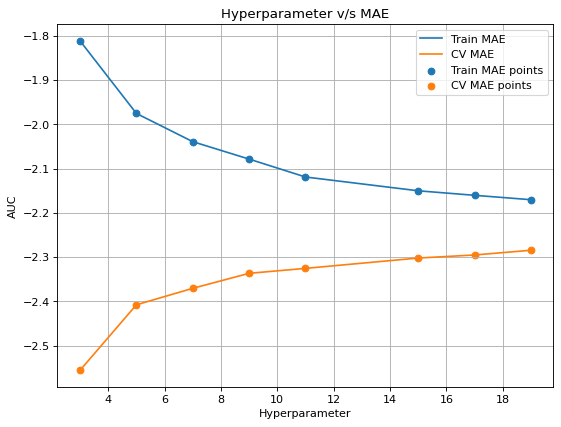

In [ ]:
#train_auc = -1*train_auc
#cv_auc    = -1*cv_auc
figure(figsize=(8, 6), dpi=80)
plt.plot(a['n_neighbors'] , train_auc, label='Train MAE')
plt.plot(a['n_neighbors'] , cv_auc, label='CV MAE')
plt.scatter(a['n_neighbors'], train_auc, label='Train MAE points')
plt.scatter(a['n_neighbors'], cv_auc, label='CV MAE points')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter v/s MAE")
plt.grid()

In [ ]:
clf = KNeighborsRegressor(n_neighbors = 11)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pre_train = clf.predict(x_train)
y_pre_test = clf.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test))

The mean absolute error on train data ==> 2.0985987695346564
The mean absolute error on test  data ==> 2.347933273473607


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test))

The mean absolute percentage error on train data ==> 3.858136758405626
The mean absolute percentage error on test  data ==> 3.971615890350946


Here we apply a very basic model which is KNN here we do hyperparameters and then we build the model.

form the MAE we can say there is no overfitting and underfitting and here we find a percentage error also 3.8%
we apply more models and try to minimize the percentage error and MAE.

## 8.2 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train , y_train)

LinearRegression()

In [ ]:
train_pre = lr_clf.predict(x_train)
test_pre  = lr_clf.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 2.026519029784439
The mean absolute error on test  data ==> 2.1282038707276283


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 4.087696563946383
The mean absolute percentage error on test  data ==> 3.8978305389235377


Here we apply a logistic regression and here also model is not underfitting and not overfitting.

## 8.3 **Xgboost Regression**

In [ ]:
import lightgbm as lgb
#Checking for various parameters
clf2 = lgb.LGBMRegressor(n_jobs=-1) 
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50]} 
clf2 = RandomizedSearchCV(clf2, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf2.fit(x_train, y_train)
print(clf2.best_params_)

{'n_estimators': 50, 'max_depth': 5}


In [ ]:
clf_2 = lgb.LGBMRegressor(max_depth = 5 ,n_estimators = 50)
clf_2.fit(x_train , y_train)

LGBMRegressor(max_depth=5, n_estimators=50)

In [ ]:
train_pre = clf_2.predict(x_train)
test_pre  = clf_2.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 2.026519029784439
The mean absolute error on test  data ==> 2.1282038707276283


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 4.087696563946383
The mean absolute percentage error on test  data ==> 3.8978305389235377


Here we apply the xgboost regression and the model is work well here

## 8.4 **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
classification  = RandomForestRegressor(n_jobs = -1)
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50] } 
clf3 = RandomizedSearchCV(classification, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf3.fit(x_train, y_train)
print(clf3.best_params_)

{'n_estimators': 500, 'max_depth': 5}


In [ ]:
clf_3 = RandomForestRegressor(max_depth = 5 ,n_estimators = 500 )
clf_3.fit(x_train , y_train) 

RandomForestRegressor(max_depth=5, n_estimators=500)

In [ ]:
train_pre = clf_3.predict(x_train)
test_pre  = clf_3.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.901967224593103
The mean absolute error on test  data ==> 2.0927767100173114


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 3.4949607383075296
The mean absolute percentage error on test  data ==> 4.048414005648991


Here we apply the random forest regression and by looking at the value of percentage error here we are very little bit overfitting, maybe it occurs because of less amount of fewer data.

## 8.5  **Use both model xgboost and random forest**

In [ ]:
xgb_train = clf_2.predict(x_train)
rf_train  = train_pre = clf_3.predict(x_train)

In [ ]:
train_pre_both = (xgb_train + rf_train) / 2

In [ ]:
xgb_test = clf_2.predict(x_test)
rf_test  = train_pre = clf_3.predict(x_test)

In [ ]:
test_pre_both = (xgb_test + rf_test) / 2

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre_both))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre_both))

The mean absolute error on train data ==> 1.7623746001056328
The mean absolute error on test  data ==> 2.0925963795066798


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre_both))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre_both))

The mean absolute percentage error on train data ==> 3.1910344504635035
The mean absolute percentage error on test  data ==> 4.117506155884529


Let's combine the XGboost and RF model and we predict the value,
by looking at the value of percentage error, and by looking at this value, we can say 
model is little bit overfitting it may be because of the less number of train data but the MAE is very less than the other model.

In [10]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["KNN", "2.098", "2.347", "3.85 %" , '3.97 %'])
myTable.add_row(["Linear Regression", "2.026", "2.128", "4.08 %" , '3.89 %'])
myTable.add_row(["Xgboost", "2.026", "2.128", "4.08 %" , '3.89 %'])
myTable.add_row(["Random Forest", "1.909", "2.092", "3.49 %" , '4.08 %'])
myTable.add_row(["Xgboost + RF", "1.762", "2.092", "3.19 %" , '4.11 %'])


print(myTable)

+-------------------+--------------+-------------+---------------+--------------+
|     Model Name    | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------+--------------+-------------+---------------+--------------+
|        KNN        |    2.098     |    2.347    |     3.85 %    |    3.97 %    |
| Linear Regression |    2.026     |    2.128    |     4.08 %    |    3.89 %    |
|      Xgboost      |    2.026     |    2.128    |     4.08 %    |    3.89 %    |
|   Random Forest   |    1.909     |    2.092    |     3.49 %    |    4.08 %    |
|    Xgboost + RF   |    1.762     |    2.092    |     3.19 %    |    4.11 %    |
+-------------------+--------------+-------------+---------------+--------------+


Here from all the models, we say that the combination of xgboost and Random forest is the winner here

### To improve the MAE and MAPE we have to come up with more feature engineering.

To improve the MAE we come up with the new features, basically, we have a signal value so here we convert signal values into a spectrogram image and use this image as a feature, here we take the first 500 pixels values of the spectrogram image as a feature. 

Then we concatenate this feature with our old feature and create the new features. and we apply all algorithms and look at the performance